In [214]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [215]:
cp = pd.read_csv('marketing_campaign5.csv')
cp.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [216]:
cp.shape

(2240, 29)

In [217]:
cp.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [218]:
cp.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [219]:
cp.columns = cp.columns.str.lower()

In [220]:
cp.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
year_birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
mntwines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
mntfruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
mntmeatproducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
mntfishproducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [261]:
cp[cp['year_birth']<1930]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,6,4,1,0,0,1,0,0,0,0


In [225]:
cp['z_costcontact'].unique

<bound method Series.unique of 0       3
1       3
2       3
3       3
4       3
       ..
2235    3
2236    3
2237    3
2238    3
2239    3
Name: z_costcontact, Length: 2240, dtype: int64>

In [227]:
cp['z_revenue'].value_counts

<bound method IndexOpsMixin.value_counts of 0       11
1       11
2       11
3       11
4       11
        ..
2235    11
2236    11
2237    11
2238    11
2239    11
Name: z_revenue, Length: 2240, dtype: int64>

In [228]:
cp = cp.drop(labels=['z_costcontact', 'z_revenue'], axis=1)

In [229]:
cp.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'response'],
      dtype='object')

In [239]:
cp.income.min()

1730.0

In [240]:
cp.income.max()

666666.0

In [244]:
cp[cp['income'].isna()]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,1,7,6,0,0,0,0,0,0,0


In [248]:
cp['mntwines'].value_counts().sort_values()

1493     1
747      1
743      1
353      1
737      1
        ..
4       33
1       37
6       37
5       40
2       42
Name: mntwines, Length: 776, dtype: int64

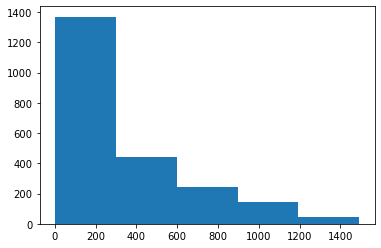

In [250]:
plt.hist(cp['mntwines'], bins=5)
plt.show()

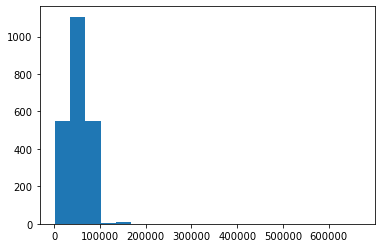

In [253]:
plt.hist(cp['income'], bins=20)
plt.show()

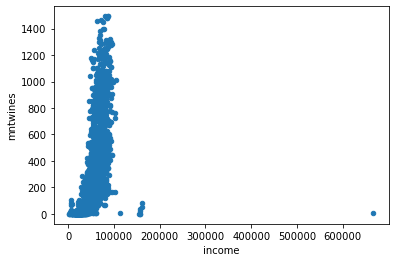

In [254]:
cp.plot.scatter('income', 'mntwines')
plt.show()

In [255]:
cp[cp['income']>200000]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,1,3,6,0,0,0,0,0,0,0
